## Logistic Regression
1. Binary Classification
2. Sigmoid function


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sigmoid(x): 
    return 1/(1+np.exp(-x))

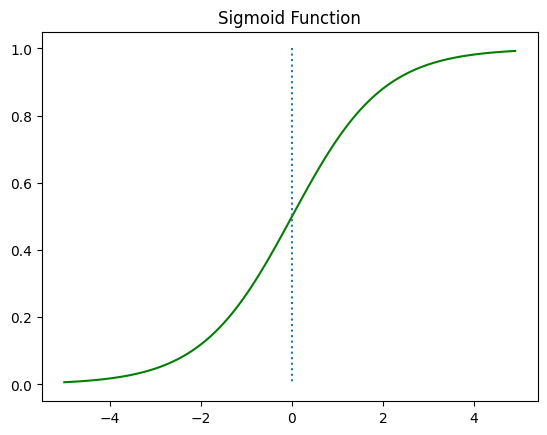

In [3]:
# W = 1 , b = 0 인 그래프

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y, 'g')
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

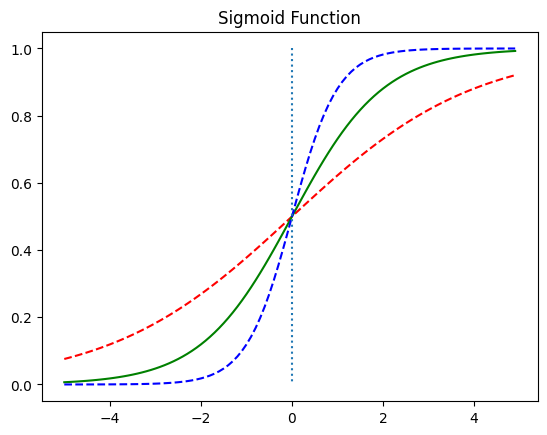

In [4]:
# W값 변화에 따른 경사도의 변화
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(0.5*x)
y2 = sigmoid(x)
y3 = sigmoid(2*x)

plt.plot(x, y1, 'r', linestyle='--') # W의 값이 0.5일때
plt.plot(x, y2, 'g') # W의 값이 1일때
plt.plot(x, y3, 'b', linestyle='--') # W의 값이 2일때
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()
# W 는 그래프의 경사도를 결정 , W가 커지면 경사가 커지고 W가 작아지면 경사가 작아짐

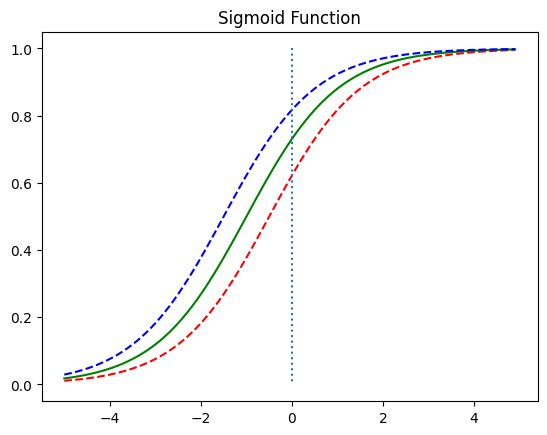

In [5]:
# b값의 변화에 따른 좌, 우 이동

x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x+0.5)
y2 = sigmoid(x+1)
y3 = sigmoid(x+1.5)

plt.plot(x, y1, 'r', linestyle='--') # x + 0.5
plt.plot(x, y2, 'g') # x + 1
plt.plot(x, y3, 'b', linestyle='--') # x + 1.5
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

In [6]:
# 파이토치로 로지스틱 회귀 구현
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


In [7]:
torch.manual_seed(1)

In [8]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)
print(x_train.shape)
print(y_train.shape)


torch.Size([6, 2])
torch.Size([6, 1])


In [9]:
W = torch.zeros((2, 1), requires_grad=True) # 크기는 2 x 1
b = torch.zeros(1, requires_grad=True)


In [10]:
hypothesis = torch.sigmoid(x_train.matmul(W) + b)
print(hypothesis) # 예측값인 H(x) 출력
print(y_train) # 실제값

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<SigmoidBackward0>)
tensor([[0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.]])


In [11]:
losses = -(y_train * torch.log(hypothesis) + (1 - y_train) * torch.log(1 - hypothesis))
print(losses)

tensor([[0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931]], grad_fn=<NegBackward0>)


In [12]:
F.binary_cross_entropy(hypothesis, y_train)

tensor(0.6931, grad_fn=<BinaryCrossEntropyBackward0>)

In [13]:
cost = losses.mean()
print(cost)

tensor(0.6931, grad_fn=<MeanBackward0>)


In [14]:
# optimizer 설정
optimizer = optim.SGD([W, b], lr=1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # Cost 계산
    hypothesis = torch.sigmoid(x_train.matmul(W) + b)
    cost = -(y_train * torch.log(hypothesis) + 
             (1 - y_train) * torch.log(1 - hypothesis)).mean()

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 0.693147
Epoch  100/1000 Cost: 0.134722
Epoch  200/1000 Cost: 0.080643
Epoch  300/1000 Cost: 0.057900
Epoch  400/1000 Cost: 0.045300
Epoch  500/1000 Cost: 0.037261
Epoch  600/1000 Cost: 0.031673
Epoch  700/1000 Cost: 0.027556
Epoch  800/1000 Cost: 0.024394
Epoch  900/1000 Cost: 0.021888
Epoch 1000/1000 Cost: 0.019852


In [15]:
hypothesis = torch.sigmoid(x_train.matmul(W) + b)
print(hypothesis)

tensor([[2.7648e-04],
        [3.1608e-02],
        [3.8977e-02],
        [9.5622e-01],
        [9.9823e-01],
        [9.9969e-01]], grad_fn=<SigmoidBackward0>)


In [16]:
prediction = hypothesis >= torch.FloatTensor([0.5])
print(prediction)

tensor([[False],
        [False],
        [False],
        [ True],
        [ True],
        [ True]])


In [17]:
print(W)
print(b)


tensor([[3.2530],
        [1.5179]], requires_grad=True)
tensor([-14.4819], requires_grad=True)


In [18]:
# 04-02 nn.Module과 클래스로 구현하는 로지스틱 회귀
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [19]:
model = nn.Sequential(
    nn.Linear(2,1), # input_dim = 2, output_dim = 1
    nn.Sigmoid() # 출력은 시그모이드 함수를 거친다
)

In [20]:
model(x_train) # W,b 랜덤 초기화 상태

tensor([[0.4020],
        [0.4147],
        [0.6556],
        [0.5948],
        [0.6788],
        [0.8061]], grad_fn=<SigmoidBackward0>)

In [21]:
# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=1)

nb_epochs = 1000

for epoch in range(nb_epochs + 1):

    # H(x) 계산
    hypothesis = model(x_train)
    # cost 계산
    cost = F.binary_cross_entropy(hypothesis, y_train)
    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    # 20번마다 로그 출력
    if epoch % 10 == 0:
        prediction = hypothesis >= torch.FloatTensor([0.5]) # 예측값이 0.5를 넘으면 True로 간주
        correct_prediction = prediction.float() == y_train # 실제값과 일치하는 경우만 True로 간주
        accuracy = correct_prediction.sum().item() / len(correct_prediction) # 정확도를 계산
        print('Epoch {:4d}/{} Cost: {:.6f} Accuracy {:2.2f}%'.format( # 각 에포크마다 정확도를 출력
            epoch, nb_epochs, cost.item(), accuracy * 100,
        ))


Epoch    0/1000 Cost: 0.539713 Accuracy 83.33%
Epoch   10/1000 Cost: 0.614851 Accuracy 66.67%
Epoch   20/1000 Cost: 0.441875 Accuracy 66.67%
Epoch   30/1000 Cost: 0.373145 Accuracy 83.33%
Epoch   40/1000 Cost: 0.316358 Accuracy 83.33%
Epoch   50/1000 Cost: 0.266094 Accuracy 83.33%
Epoch   60/1000 Cost: 0.220498 Accuracy 100.00%
Epoch   70/1000 Cost: 0.182095 Accuracy 100.00%
Epoch   80/1000 Cost: 0.157299 Accuracy 100.00%
Epoch   90/1000 Cost: 0.144091 Accuracy 100.00%
Epoch  100/1000 Cost: 0.134272 Accuracy 100.00%
Epoch  110/1000 Cost: 0.125769 Accuracy 100.00%
Epoch  120/1000 Cost: 0.118297 Accuracy 100.00%
Epoch  130/1000 Cost: 0.111680 Accuracy 100.00%
Epoch  140/1000 Cost: 0.105779 Accuracy 100.00%
Epoch  150/1000 Cost: 0.100483 Accuracy 100.00%
Epoch  160/1000 Cost: 0.095704 Accuracy 100.00%
Epoch  170/1000 Cost: 0.091369 Accuracy 100.00%
Epoch  180/1000 Cost: 0.087420 Accuracy 100.00%
Epoch  190/1000 Cost: 0.083806 Accuracy 100.00%
Epoch  200/1000 Cost: 0.080486 Accuracy 100.00

In [22]:
model(x_train)

tensor([[2.7616e-04],
        [3.1595e-02],
        [3.8959e-02],
        [9.5624e-01],
        [9.9823e-01],
        [9.9969e-01]], grad_fn=<SigmoidBackward0>)

In [23]:
print(list(model.parameters()))

[Parameter containing:
tensor([[3.2534, 1.5181]], requires_grad=True), Parameter containing:
tensor([-14.4839], requires_grad=True)]


In [24]:
# 모델을 클래스로 구현하기
class BinaryClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(2,1)
        self.sigmoid = nn.Sigmoid()
    def forward(self, x):
        return self.sigmoid(self.linear(x))

model = BinaryClassifier()

In [25]:
# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    hypothesis = model(x_train)

    # cost 계산
    cost = F.binary_cross_entropy(hypothesis, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 20번마다 로그 출력
    if epoch % 10 == 0:
        prediction = hypothesis >= torch.FloatTensor([0.5]) # 예측값이 0.5를 넘으면 True로 간주
        correct_prediction = prediction.float() == y_train # 실제값과 일치하는 경우만 True로 간주
        accuracy = correct_prediction.sum().item() / len(correct_prediction) # 정확도를 계산
        print('Epoch {:4d}/{} Cost: {:.6f} Accuracy {:2.2f}%'.format( # 각 에포크마다 정확도를 출력
            epoch, nb_epochs, cost.item(), accuracy * 100,
        ))


Epoch    0/1000 Cost: 0.614994 Accuracy 66.67%
Epoch   10/1000 Cost: 0.747550 Accuracy 83.33%
Epoch   20/1000 Cost: 0.633216 Accuracy 83.33%
Epoch   30/1000 Cost: 0.538122 Accuracy 83.33%
Epoch   40/1000 Cost: 0.450406 Accuracy 83.33%
Epoch   50/1000 Cost: 0.366382 Accuracy 83.33%
Epoch   60/1000 Cost: 0.287368 Accuracy 83.33%
Epoch   70/1000 Cost: 0.219288 Accuracy 83.33%
Epoch   80/1000 Cost: 0.173225 Accuracy 100.00%
Epoch   90/1000 Cost: 0.151674 Accuracy 100.00%
Epoch  100/1000 Cost: 0.140280 Accuracy 100.00%
Epoch  110/1000 Cost: 0.131002 Accuracy 100.00%
Epoch  120/1000 Cost: 0.122903 Accuracy 100.00%
Epoch  130/1000 Cost: 0.115765 Accuracy 100.00%
Epoch  140/1000 Cost: 0.109426 Accuracy 100.00%
Epoch  150/1000 Cost: 0.103760 Accuracy 100.00%
Epoch  160/1000 Cost: 0.098664 Accuracy 100.00%
Epoch  170/1000 Cost: 0.094056 Accuracy 100.00%
Epoch  180/1000 Cost: 0.089870 Accuracy 100.00%
Epoch  190/1000 Cost: 0.086050 Accuracy 100.00%


Epoch  200/1000 Cost: 0.082549 Accuracy 100.00%
Epoch  210/1000 Cost: 0.079328 Accuracy 100.00%
Epoch  220/1000 Cost: 0.076356 Accuracy 100.00%
Epoch  230/1000 Cost: 0.073604 Accuracy 100.00%
Epoch  240/1000 Cost: 0.071048 Accuracy 100.00%
Epoch  250/1000 Cost: 0.068668 Accuracy 100.00%
Epoch  260/1000 Cost: 0.066446 Accuracy 100.00%
Epoch  270/1000 Cost: 0.064367 Accuracy 100.00%
Epoch  280/1000 Cost: 0.062417 Accuracy 100.00%
Epoch  290/1000 Cost: 0.060584 Accuracy 100.00%
Epoch  300/1000 Cost: 0.058858 Accuracy 100.00%
Epoch  310/1000 Cost: 0.057231 Accuracy 100.00%
Epoch  320/1000 Cost: 0.055692 Accuracy 100.00%
Epoch  330/1000 Cost: 0.054236 Accuracy 100.00%
Epoch  340/1000 Cost: 0.052856 Accuracy 100.00%
Epoch  350/1000 Cost: 0.051546 Accuracy 100.00%
Epoch  360/1000 Cost: 0.050301 Accuracy 100.00%
Epoch  370/1000 Cost: 0.049115 Accuracy 100.00%
Epoch  380/1000 Cost: 0.047986 Accuracy 100.00%
Epoch  390/1000 Cost: 0.046908 Accuracy 100.00%
Epoch  400/1000 Cost: 0.045878 Accuracy 

## Softmax Regression

### 05-01 One-Hot Encoding
    - 각 클래스간의 표현 방법이 무작위성을 가진다는 점 표현할 수 있음
    - 무작위성이 꼭 좋은것만은 아님(순서있는 클래스거나 할때)

### 05-02 Softmax Regression 이해하기
    - e를 쓰는이유는 큰 값을 더 강조하기 위해 (지수함수)
    - 각 클래스가 나올 확률을 나타냄

### Cross-Entropy function
    - Entropy : 정보량의 기대값 = -plog(p)
        - 정보량 : -log(p) (흔히 밑이 2인 log)
    - Cross-Entropy : -plog(q) q는 그 클래스가 나올 확률 즉 softmax 값

In [58]:
# 파이토치로 소프트맥스의 비용 함수 구현하기(low-level)
z = torch.FloatTensor([1,2,3])
hypothesis = F.softmax(z, dim=0)
print(hypothesis)

tensor([0.0900, 0.2447, 0.6652])


In [27]:
z = torch.rand(3, 5, requires_grad=True) # 임의의 3x5 행렬 텐서
hypothesis = F.softmax(z, dim=1) # 두번째 차원에 대해서 소프트맥스 적용 dim=1 (?)
print(hypothesis)

tensor([[0.1685, 0.2409, 0.2002, 0.1757, 0.2146],
        [0.2063, 0.2416, 0.1656, 0.1941, 0.1924],
        [0.1913, 0.1776, 0.2755, 0.2079, 0.1477]], grad_fn=<SoftmaxBackward0>)


In [28]:
y = torch.randint(5, (3,)).long() # 0~4 정수중 뽑아서 (3,) 원소 3개인 1차원 텐서로 만들기 .long 은 torch.int64 longtensor
print(y)

tensor([3, 1, 4])


In [30]:
# 모든 원소가 0의 값을 가진 3 x 5 텐서 생성
y_one_hot = torch.zeros_like(hypothesis)
y_one_hot.scatter_(1, y.unsqueeze(1), 1)
# y.unsqueeze(1) -> (3x1)텐서로 변환
# scatter(1,y.unsqueeze(1), 1) scatter()첫번째 인자는 dim , 두번째는 값, 3번째는 넣을 값
# 즉 dim=1(가로방향) y 위치에 1을 넣어라
# 함수뒤에 _ 붙이면 in-place operation(덮어쓰기)

tensor([[0., 0., 0., 1., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1.]])

In [31]:
cost = (y_one_hot * -torch.log(hypothesis)).sum(dim=1).mean() # 크로스엔트로피 합의 평균
print(cost)

tensor(1.6906, grad_fn=<MeanBackward0>)


In [32]:
# 파이토치로 소프트맥스의 비용 함수 구현하기(high-level)
F.log_softmax(z, dim=1)

tensor([[-1.7806, -1.4233, -1.6082, -1.7389, -1.5390],
        [-1.5784, -1.4205, -1.7980, -1.6396, -1.6481],
        [-1.6538, -1.7283, -1.2892, -1.5707, -1.9125]],
       grad_fn=<LogSoftmaxBackward0>)

In [34]:
F.nll_loss(F.log_softmax(z, dim=1), y) #nll : negative log likelihood

tensor(1.6906, grad_fn=<NllLossBackward0>)

In [35]:
F.cross_entropy(z,y) #F.cross_entropy는 비용함수에 소프트맥스 함수까지 포함하고 있음!

tensor(1.6906, grad_fn=<NllLossBackward0>)

In [37]:
# 소프트맥스 회귀 구현
x_train = [[1, 2, 1, 1],
           [2, 1, 3, 2],
           [3, 1, 3, 4],
           [4, 1, 5, 5],
           [1, 7, 5, 5],
           [1, 2, 5, 6],
           [1, 6, 6, 6],
           [1, 7, 7, 7]]
y_train = [2, 2, 2, 1, 1, 1, 0, 0]
x_train = torch.FloatTensor(x_train)
y_train = torch.LongTensor(y_train)
print(x_train.shape)
print(y_train.shape)

torch.Size([8, 4])
torch.Size([8])


In [38]:
y_one_hot = torch.zeros(8, 3)
y_one_hot.scatter_(1, y_train.unsqueeze(1), 1)
print(y_one_hot.shape)

torch.Size([8, 3])


In [39]:
# x_train (8,4) y_one_hot(8,3) W는 (4,3)
# 모델 초기화
W = torch.zeros((4,3), requires_grad=True)
b = torch.zeros((1,3), requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W,b], lr=0.1)

In [40]:
nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # 가설
    hypothesis = F.softmax(x_train.matmul(W) + b, dim=1) 

    # 비용 함수
    cost = (y_one_hot * -torch.log(hypothesis)).sum(dim=1).mean()

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))


Epoch    0/1000 Cost: 1.098612
Epoch  100/1000 Cost: 0.704199
Epoch  200/1000 Cost: 0.623000
Epoch  300/1000 Cost: 0.565717
Epoch  400/1000 Cost: 0.515291
Epoch  500/1000 Cost: 0.467662
Epoch  600/1000 Cost: 0.421278
Epoch  700/1000 Cost: 0.375402
Epoch  800/1000 Cost: 0.329766
Epoch  900/1000 Cost: 0.285073
Epoch 1000/1000 Cost: 0.248155


In [41]:
# 소프트맥스 회귀 구현하기 (high-level)
# 모델 초기화
W = torch.zeros((4, 3), requires_grad=True)
b = torch.zeros((1, 3), requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W, b], lr=0.1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # Cost 계산
    z = x_train.matmul(W) + b
    cost = F.cross_entropy(z, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))


Epoch    0/1000 Cost: 1.098612
Epoch  100/1000 Cost: 0.704199
Epoch  200/1000 Cost: 0.623000
Epoch  300/1000 Cost: 0.565717
Epoch  400/1000 Cost: 0.515291
Epoch  500/1000 Cost: 0.467662
Epoch  600/1000 Cost: 0.421278
Epoch  700/1000 Cost: 0.375401
Epoch  800/1000 Cost: 0.329766
Epoch  900/1000 Cost: 0.285073
Epoch 1000/1000 Cost: 0.248155


In [42]:
# nn.Module로 소프트맥스 회귀 구현하기
# 모델을 선언 및 초기화. 4개의 특성을 가지고 3개의 클래스로 분류. input_dim=4, output_dim=3.
model = nn.Linear(4, 3)
# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=0.1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    prediction = model(x_train)

    # cost 계산
    cost = F.cross_entropy(prediction, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 20번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))


Epoch    0/1000 Cost: 1.941431
Epoch  100/1000 Cost: 0.632167
Epoch  200/1000 Cost: 0.555505
Epoch  300/1000 Cost: 0.502929
Epoch  400/1000 Cost: 0.459414
Epoch  500/1000 Cost: 0.420432
Epoch  600/1000 Cost: 0.383825
Epoch  700/1000 Cost: 0.348151
Epoch  800/1000 Cost: 0.312282
Epoch  900/1000 Cost: 0.275761
Epoch 1000/1000 Cost: 0.244481


In [43]:
# 소프트맥스 회귀 클래스로 구현
class SoftmaxClassifierModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(4, 3) # Output이 3!

    def forward(self, x):
        return self.linear(x)

model = SoftmaxClassifierModel()

# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=0.1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    prediction = model(x_train)

    # cost 계산
    cost = F.cross_entropy(prediction, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 20번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))



Epoch    0/1000 Cost: 1.921756
Epoch  100/1000 Cost: 0.722736
Epoch  200/1000 Cost: 0.644006
Epoch  300/1000 Cost: 0.587300
Epoch  400/1000 Cost: 0.537219
Epoch  500/1000 Cost: 0.489906
Epoch  600/1000 Cost: 0.443868
Epoch  700/1000 Cost: 0.398372
Epoch  800/1000 Cost: 0.353054
Epoch  900/1000 Cost: 0.308032
Epoch 1000/1000 Cost: 0.265574


In [45]:
# 05-04 소프트맥스 회귀로 MNIST 데이터 분류하기
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import random

In [46]:
USE_MPS = torch.mps.is_available() # GPU를 사용가능하면 True, 아니라면 False를 리턴
device = torch.device("mps" if USE_MPS else "cpu") # GPU 사용 가능하면 사용하고 아니면 CPU 사용
print("다음 기기로 학습합니다:", device)

다음 기기로 학습합니다: mps


In [47]:
# for reproducibility
random.seed(777)
torch.manual_seed(777)
if device == 'mps':
    torch.mps.manual_seed_all(777)


In [48]:
# hyperparameters
training_epochs = 15
batch_size = 100

In [49]:
# MNIST dataset
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

100%|██████████| 9.91M/9.91M [00:02<00:00, 3.70MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 155kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.54MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 1.87MB/s]


In [50]:
# dataset loader
data_loader = DataLoader(dataset=mnist_train,
                                          batch_size=batch_size, # 배치 크기는 100
                                          shuffle=True,
                                          drop_last=True) # drop_last 마지막 배치는 수가 적을수도 있다.
# 마지막 배치 버리면 마지막 배치가 수가 적어서 상대적으로 과대 평가되는 현상 막아줄수 있음.


In [51]:
# MNIST data image of shape 28 * 28 = 784
linear = nn.Linear(784, 10, bias=True).to(device)

In [52]:
criterion = nn.CrossEntropyLoss().to(device) 
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)

In [53]:
for epoch in range(training_epochs): 
    avg_cost = 0
    total_batch = len(data_loader)

    for X,Y in data_loader:
        # 배치 크기가 100이므로 아래의 연산에서는 X는 (100,784)의 텐서가 된다.
        X = X.view(-1, 28 * 28).to(device)
        # 레이블은 원-핫 인코딩이 된 상태가 아니라 0~9의 정수.
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = linear(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('Epoch:', '%04d' % (epoch +1), 'cost =', f'{avg_cost:.9f}')

print('Learning finished')

Epoch: 0001 cost = 0.535150588
Epoch: 0002 cost = 0.359577715
Epoch: 0003 cost = 0.331264228
Epoch: 0004 cost = 0.316404700
Epoch: 0005 cost = 0.307107002
Epoch: 0006 cost = 0.300456554
Epoch: 0007 cost = 0.294933408
Epoch: 0008 cost = 0.290956169
Epoch: 0009 cost = 0.287074089
Epoch: 0010 cost = 0.284515619
Epoch: 0011 cost = 0.281914055
Epoch: 0012 cost = 0.279526860
Epoch: 0013 cost = 0.277636588
Epoch: 0014 cost = 0.275874764
Epoch: 0015 cost = 0.274422765
Learning finished


Accuracy: 0.8883000016212463
Label 5
Prediction:  3


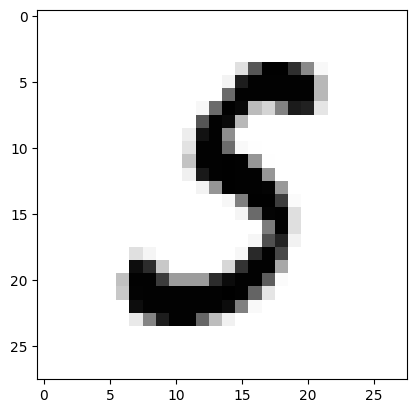

In [56]:
# 테스트 데이터를 사용하여 모델을 테스트
with torch.no_grad(): # gradient 계산 수행 안하게
    X_test = mnist_test.test_data.view(-1, 28*28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    # MNIST 테스트 데이터에서 무작위로 하나를 뽑아서 예측을 해본다.
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r+1].view(-1, 28*28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r+1].to(device)

    print('Label', Y_single_data.item())
    single_prediction = linear(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

    plt.imshow(mnist_test.test_data[r:r+1].view(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()